In [1]:
from sklearn import datasets
import numpy as np

## Loading the data

In [2]:
dataset = datasets.load_boston()
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
x = dataset['data']
y = dataset['target']
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Splitting the data

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

## Modelling the data

In [6]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7261570836552476

In [49]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.001)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7261512084954036

In [50]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.7260566114989153

## Trying to improve the model through correlation

In [83]:
import pandas as pd
df_x = pd.DataFrame(x, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_y = pd.DataFrame(y, columns=['PRICE'])

In [84]:
df = pd.concat([df_x,df_y],axis=1)
cor = df.corr()

<AxesSubplot:>

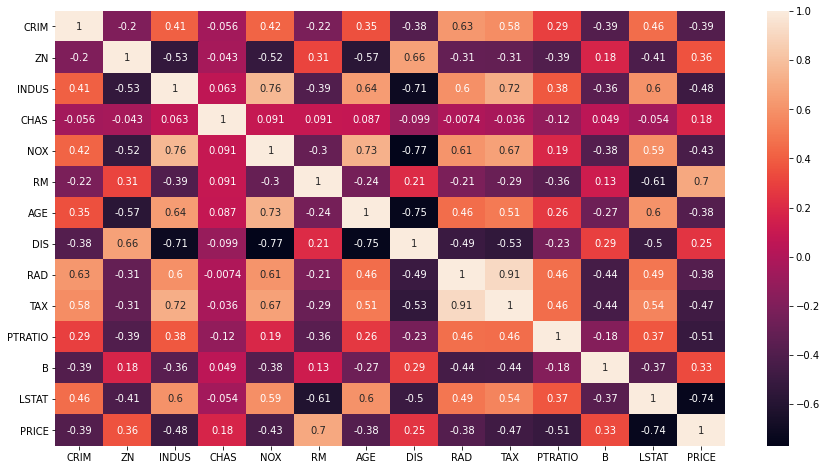

In [85]:
import seaborn as sn
plt.figure(figsize=(15,8))
sn.heatmap(cor, annot=True)

In [86]:
df.drop(columns='LSTAT', inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


In [87]:
df_price = df['PRICE']
new_df = df.drop(columns='PRICE')

In [88]:
x_new = np.array(new_df)
y_new = np.array(df_price)
x_new

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        3.9690e+02],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        3.9690e+02],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        3.9283e+02],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9690e+02],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9345e+02],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        3.9690e+02]])

In [96]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.33, random_state=42)
train_y.shape

(339,)

In [97]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.6878616094457028

In [98]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.001)
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.6878787985742174

In [92]:
# This did not work

## Trying Polynomial Regression on the data

In [48]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, interaction_only=True)
poly_train_x = pf.fit_transform(train_x)
poly_test_x = pf.fit_transform(test_x)
poly_train_x[0].shape

(92,)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_train_x, train_y)
model.score(poly_test_x, test_y)

0.8107365328394454

In [63]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.001)
model.fit(poly_train_x, train_y)
model.score(poly_test_x, test_y)

0.8597209827441936

In [60]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(poly_train_x, train_y)
model.score(poly_test_x, test_y)

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1826.1920359728326, tolerance: 3.9414116263736276
  model = cd_fast.enet_coordinate_descent(


0.8148022114260925

In [64]:
# Finally, we get our maximum accuracy of 85.97% using Ridge regression. From this, we can also conclude that
# regularization techniques like l1 and l2 should be used in higher degrees of features i.e. in polynomial regression.
# Also, quadratic function is more fit to the data above rather than linear function.